In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('bmh')

,Dist,Elev
463,615.797484,828.000000
464,619.853189,828.748588
465,621.394361,829.000000
466,623.921466,829.396355
467,626.526724,829.800604


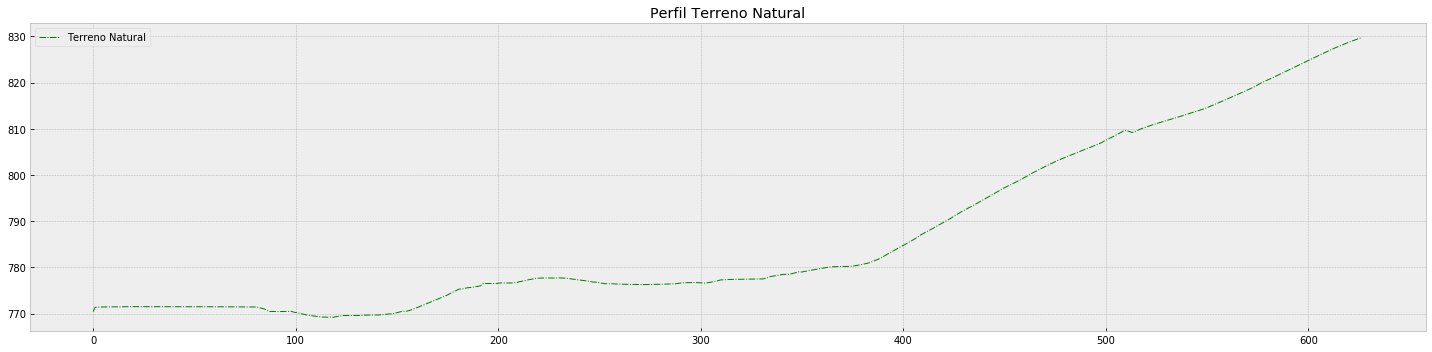

In [28]:
df_Profile = pd.read_csv('Profile_Analise.csv')

plt.figure(figsize=(20,5))

plt.plot(df_Profile['Dist'], df_Profile['Elev'], color='g', linestyle='-.', linewidth=1, label='Terreno Natural')

plt.legend()
plt.title('Perfil Terreno Natural')

plt.tight_layout()

df_Profile.tail()

## Calculo de Greide com Função Polynomial

In [29]:
Polynom = np.polyfit(df_Profile['Dist'], df_Profile['Elev'], np.floor(len(df_Profile['Dist']) * 0.05))
df_Profile['Greide'] = np.polyval(Polynom, df_Profile['Dist'])

df_Profile.tail()

c:\users\gomee11\documents\_apps\vscode\.python\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


,Dist,Elev,Greide
463,615.797484,828.000000,827.989063
464,619.853189,828.748588,828.922628
465,621.394361,829.000000,829.229492
466,623.921466,829.396355,829.575580
467,626.526724,829.800604,829.549838


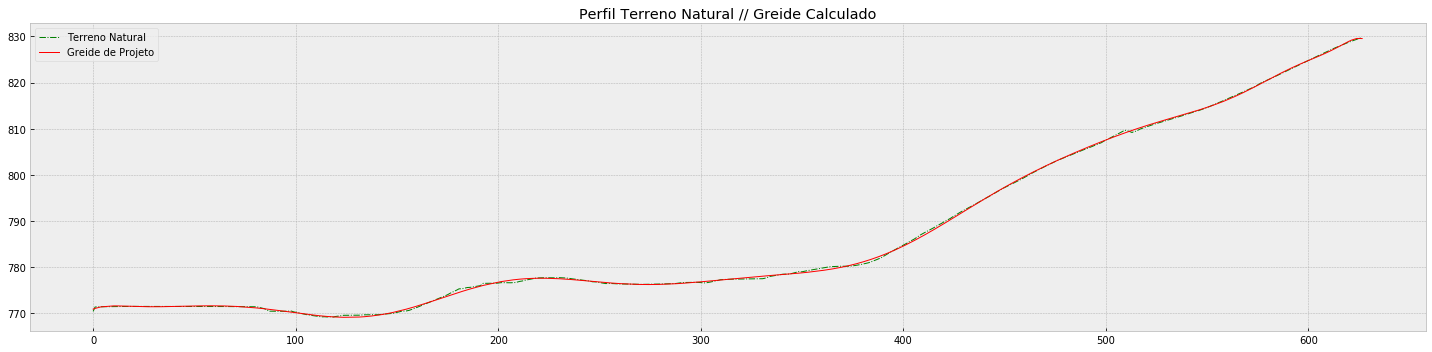

In [30]:
plt.figure(figsize=(20,5))

plt.plot(df_Profile['Dist'], df_Profile['Elev'], color='g', linestyle='-.', linewidth=1, label='Terreno Natural')
plt.plot(df_Profile['Dist'], df_Profile['Greide'], color='r', linewidth=1, label='Greide de Projeto')

plt.legend()
plt.title('Perfil Terreno Natural // Greide Calculado')

plt.tight_layout()

In [31]:
df_Profile[['Dist', 'Greide']].to_csv('Profile_Analise_Greide.txt', sep=' ', index=False, header=False)

### Inclinação do Perfil
---

>Inclinacao = Desnivel / Distancia

In [38]:
df_Profile['Desnivel'] = df_Profile['Elev'] - df_Profile['Elev'].shift(1)
#df_Profile['Desnivel'] = df_Profile['Desnivel'].fillna(0)
df_Profile.tail()

,Dist,Elev,Greide,Desnivel,Inclinacao TN,Elev 8.0%,Desnivel 8.0%,Inc 8.0%
463,615.797484,828.000000,827.989063,0.481942,0.000783,828.000000,0.481942,0.000783
464,619.853189,828.748588,828.922628,0.748588,0.001208,828.748588,0.748588,0.001208
465,621.394361,829.000000,829.229492,0.251412,0.000405,829.000000,0.251412,0.000405
466,623.921466,829.396355,829.575580,0.396355,0.000635,829.396355,0.396355,0.000635
467,626.526724,829.800604,829.549838,0.404249,0.000645,829.800604,0.404249,0.000645


In [39]:
df_Profile['Inclinacao TN'] = (df_Profile['Desnivel'] / df_Profile['Dist'])
#df_Profile['Inclinacao TN'] = df_Profile['Inclinacao TN'].fillna(0)
df_Profile.head()

,Dist,Elev,Greide,Desnivel,Inclinacao TN,Elev 8.0%,Desnivel 8.0%,Inc 8.0%
0,0.000000,770.424409,770.914292,NaN,NaN,770.424409,NaN,NaN
1,0.902825,771.367256,771.063576,0.942847,1.044330,61.709380,-708.715029,-784.997124
2,0.937119,771.368566,771.068745,0.001310,0.001398,771.368566,709.659186,757.277555
3,3.910769,771.430308,771.400400,0.061742,0.015788,771.430308,0.061742,0.015788
4,10.089751,771.461696,771.612303,0.031388,0.003111,771.461696,0.031388,0.003111


In [70]:
inc = 0.08

tag_Elv = 'Elev ' + str(inc * 100) + '%'
tag_Inc = 'Inc ' + str(inc * 100) + '%'
tag_Des = 'Desnivel ' + str(inc * 100) + '%'

df_Profile[tag_Elv] = np.where(df_Profile['Inclinacao TN'] >= inc,
                               np.where(df_Profile['Desnivel'] > 0,
                                        df_Profile['Elev'] - (df_Profile['Desnivel'] - df_Profile['Desnivel'] * inc),
                                        df_Profile['Elev'] + (df_Profile['Desnivel'] - df_Profile['Desnivel'] * (- inc))
                                       ),
                               #df_Profile['Elev'] - df_Profile['Desnivel'] * inc,
                               df_Profile['Elev']
                              )

df_Profile[tag_Des] = df_Profile[tag_Elv] - df_Profile[tag_Elv].shift(1)
df_Profile[tag_Inc] = (df_Profile[tag_Des] / df_Profile['Dist'])
df_Profile.head()

df_Profile[['Elev', tag_Elv, 'Inclinacao TN', tag_Inc]]

,Elev,Elev 8.0%,Inclinacao TN,Inc 8.0%
0,770.424409,770.424409,NaN,NaN
1,771.367256,770.499837,1.044330,0.083546
2,771.368566,771.368566,0.001398,0.927021
3,771.430308,771.430308,0.015788,0.015788
4,771.461696,771.461696,0.003111,0.003111
5,771.486894,771.486894,0.002153,0.002153
6,771.504806,771.504806,0.000943,0.000943
7,771.503617,771.503617,-0.000046,-0.000046
8,771.505847,771.505847,0.000083,0.000083
9,771.509664,771.509664,0.000140,0.000140
